## Week 10 Independent Lab: Decision Trees 
Author: Aerionna Skrutvold  
Course: BGEN632 Grad. Intro to Python  

The purpose for this assignment is to practice implementing decision trees in Python. The program primarily makes use of the CaliforniaHospitalData.txt file contained within the data folder.

## Import Modules

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install factor-analyzer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

## Set Working Directory 

In [26]:
os.chdir("C:/Users/gcassist/Desktop/MSBA/Spring 25/Python/week10labs/data")  

## Access Data 

In [27]:
CA_Personnel = pd.read_csv("calihospital.txt", sep="\t", engine="python", header=0) #open California Hospital data 

In [28]:
CA_Personnel.columns

Index(['HospitalID', 'Name', 'Zip', 'Website', 'TypeControl', 'Teaching',
       'DonorType', 'NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev',
       'OperInc', 'AvlBeds', 'Work_ID', 'LastName', 'FirstName', 'Gender',
       'PositionID', 'PositionTitle', 'Compensation', 'MaxTerm', 'StartDate'],
      dtype='object')

## Create Decision Trees

Using `operating income` as a target variable, create a tree

In [29]:
CA_subset = CA_Personnel[['OperInc','AvlBeds', 'Teaching', 'NetPatRev']] # Select columns 

In [30]:
X = CA_subset.drop(columns='OperInc')  # predictors
y = CA_subset['OperInc']               # target

In [31]:
X_encoded = pd.get_dummies(X, columns=['Teaching'], drop_first=True) # Change to binary 

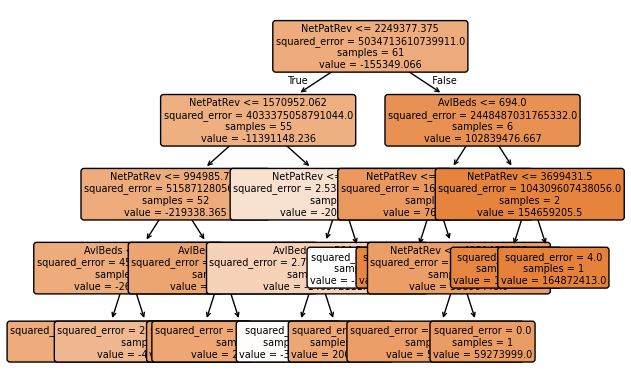

In [45]:
tree_model = DecisionTreeRegressor(max_depth=4).fit(X_encoded, y)

tree.plot_tree(tree_model, feature_names=X_encoded.columns, filled=True, rounded=True, fontsize=7)

plt.show()

For Operating Income, Net Patient Revenue is the most influencial factor shown in our tree. The second highest predictor is available beds. 

Using `operating revenue` as a target variable, create a tree 

In [36]:
# prepare data
CA_subset2 = CA_Personnel[['OperRev','AvlBeds', 'Teaching', 'TypeControl']] # Select columns 

X2 = CA_subset2.drop(columns='OperRev')  # predictors
y2 = CA_subset2['OperRev']               # target

X_encoded2 = pd.get_dummies(X2, columns=['Teaching','TypeControl'], drop_first=True) # Change to binary 

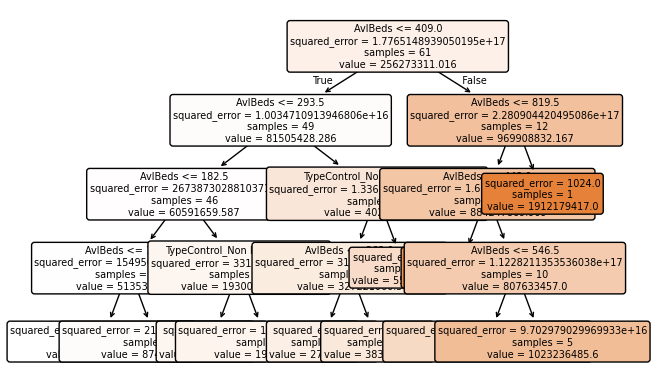

In [46]:
tree_model2 = DecisionTreeRegressor(max_depth=4).fit(X_encoded2, y2)

tree.plot_tree(tree_model2, feature_names=X_encoded2.columns, filled=True, rounded=True, fontsize=7)

plt.show()

For Operating Revenue, available beds is the most influencial factor shown in our tree. The second highest predictor is type control. 

Using `TypeControl` as a target variable, create a tree

In [39]:
# prepare data
CA_subset3 = CA_Personnel[['OperRev','AvlBeds', 'Teaching', 'TypeControl']] # Select columns 

X3 = CA_subset3.drop(columns='TypeControl')  # predictors
y3 = CA_subset3['TypeControl']               # target

X_encoded3 = pd.get_dummies(X3, columns=['Teaching'], drop_first=True) # Change to binary 

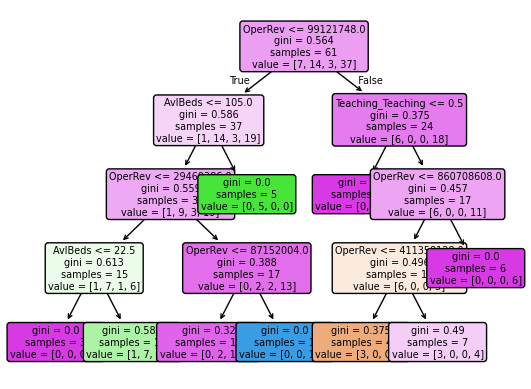

In [47]:
tree_model3 = DecisionTreeClassifier(max_depth=4).fit(X_encoded3, y3)

tree.plot_tree(tree_model3, feature_names=X_encoded3.columns, filled=True, rounded=True, fontsize=7)

plt.show()

For Type Control, we get a bit of a different tree. Operating Revenue is the most influencial factor shown in our tree. Followed by available beds and teaching.  

Using `DonorType` as a target variable, create a tree

In [43]:
# prepare data
CA_subset4 = CA_Personnel[['OperRev','AvlBeds', 'DonorType', 'TypeControl']] # Select columns 

X4 = CA_subset4.drop(columns='DonorType')  # predictors
y4 = CA_subset4['DonorType']               # target

X_encoded4 = pd.get_dummies(X4, columns=['TypeControl'], drop_first=True) # Change to binary 

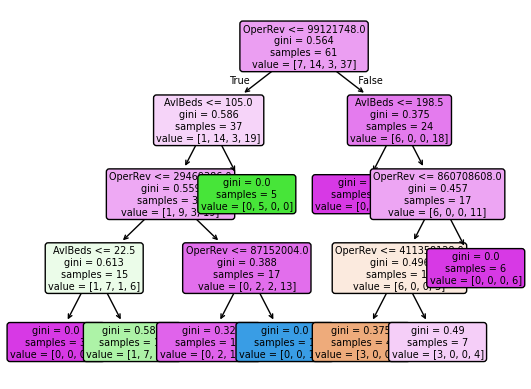

In [48]:
tree_model4 = DecisionTreeClassifier(max_depth=4).fit(X_encoded3, y3)

tree.plot_tree(tree_model4, feature_names=X_encoded4.columns, filled=True, rounded=True, fontsize=7)

plt.show()

For Donor Type, Operating Revenue is the most influencial factor shown in our tree. Followed by available beds. 

## References  
I did rely hevily on ChatGPT to help me correctly code these trees. I feel like this part of the code wasn't included in the tuturial (or I missed it) and it was causing my tree to use all variables not just three. I think the reason I struggled with the tuturial this week is that there were so many concepts, and the code felt spread out throughout, it was hard to find all the peices I need to make parts (like a decision tree) work. 

X4 = CA_subset4.drop(columns='DonorType')  # predictors
y4 = CA_subset4['DonorType']               # target

X_encoded4 = pd.get_dummies(X4, columns=['TypeControl'], drop_first=True) # Change to binary  
>>> https://chatgpt.com/share/681a5892-eb24-8012-a5c6-8204f18a1a95 